# Big Data Application: Modeling for Crop Yield Estimation

This jupyter notebook is addressed for creating model that can estimate crop yield in North Dakota, United States. The detail workflow of this project can be seen in [here](https://drive.google.com/file/d/1u3jHTnLqoxMca7SRzgnvGjP-iBvfTnls/view?usp=sharing).

## 0. Install & Load Packages

In [1]:
#install packages
!pip install tensorflow

In [2]:
#load packages

#packages for manipulating dataframe
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import sklearn

#packages for machine learning
##train-test-split
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve

##method 1: Linear Regression (LR)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

##method 2: Random Forest Regressor (RF)
import rfpimp
from sklearn.ensemble import RandomForestRegressor

##method 3: Gradient Boosting Regressor (XGB)
import xgboost
from xgboost import XGBRegressor

##method 4: Artificial Neural Network (ANN)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##cross validation

##evaluation metrics (R2 and RMSE)
from sklearn.metrics import r2_score, mean_squared_error

#data visualization
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

2024-03-30 12:30:52.422308: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-30 12:30:52.423260: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-30 12:30:52.445741: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-30 12:30:52.521859: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-30 12:30:53.354713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

## 1. Load & Cleaning Data

https://www.dropbox.com/scl/fo/u376udcrl3ynf0z1an5qg/ACjSYBpQ8BDNo44-Nzf5VcQ/WHEAT_DATA/wheat_normalization?dl=0&preview=wheat_2018_normalized.csv&rlkey=v65jm47k9nla107njw133e0me&subfolder_nav_tracking=1

In [10]:
#load data
wheat_2018 = pd.read_csv('https://www.dropbox.com/scl/fi/qyk0rjcvay0azb6k3cxzf/wheat_2018.csv?rlkey=1vmvrf6o9jiik4tsjax68ps7b&dl=1')
wheat_2019 = pd.read_csv('https://www.dropbox.com/scl/fi/qyk0rjcvay0azb6k3cxzf/wheat_2019.csv?rlkey=1vmvrf6o9jiik4tsjax68ps7b&dl=1')
wheat_2020 = pd.read_csv('https://www.dropbox.com/scl/fi/qyk0rjcvay0azb6k3cxzf/wheat_2020.csv?rlkey=1vmvrf6o9jiik4tsjax68ps7b&dl=1')
wheat_2021 = pd.read_csv('https://www.dropbox.com/scl/fi/qyk0rjcvay0azb6k3cxzf/wheat_2021.csv?rlkey=1vmvrf6o9jiik4tsjax68ps7b&dl=1')
wheat_2022 = pd.read_csv('https://www.dropbox.com/scl/fi/qyk0rjcvay0azb6k3cxzf/wheat_2022.csv?rlkey=1vmvrf6o9jiik4tsjax68ps7b&dl=1')
wheat_2023 = pd.read_csv('https://www.dropbox.com/scl/fi/qyk0rjcvay0azb6k3cxzf/wheat_2023.csv?rlkey=1vmvrf6o9jiik4tsjax68ps7b&dl=1')

In [11]:
wheat_list = [wheat_2018, wheat_2019, wheat_2020, wheat_2021, wheat_2022, wheat_2023]
wheat_df = pd.concat(wheat_list)
wheat_df = wheat_df.drop(['NAME','GEOID'], axis=1)
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 52
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Yield             318 non-null    float64
 1   ET                318 non-null    float64
 2   LST_DAY           318 non-null    float64
 3   LST_NIGHT         318 non-null    float64
 4   NDVI              318 non-null    float64
 5   Precipitation     318 non-null    float64
 6   PAR               318 non-null    float64
 7   SAR               318 non-null    float64
 8   Soil_Moisture_am  318 non-null    float64
 9   Soil_Moisture_pm  318 non-null    float64
dtypes: float64(10)
memory usage: 27.3 KB


<Axes: >

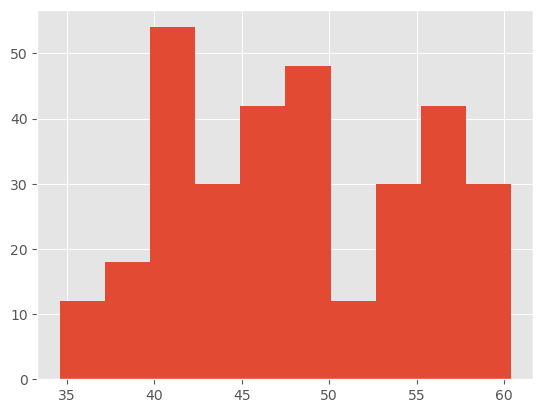

In [13]:
wheat_df.Yield.hist()

## Standard

In [ ]:
from sklearn.preprocessing import StandardScaler

# 假设wheat_df是你的DataFrame
# 提取特征列
columns = ['ET','LST_DAY','LST_NIGHT','NDVI','Precipitation', 'PAR','SAR', 'Soil_Moisture_am','Soil_Moisture_pm']

# 初始化StandardScaler
scaler = StandardScaler()

# 对特征进行标准化
wheat_df[columns] = scaler.fit_transform(wheat_df[columns])

# 显示标准化后的DataFrame
print(wheat_df.head())


1   ET                318 non-null    float64
 2   LST_DAY           318 non-null    float64
 3   LST_NIGHT         318 non-null    float64
 4   NDVI              318 non-null    float64
 5   Precipitation     318 non-null    float64
 6   PAR               318 non-null    float64
 7   SAR               318 non-null    float64
 8   Soil_Moisture_am  318 non-null    float64
 9   Soil_Moisture_pm  318 non-null    float64

In [ ]:
def standardize_columns(file_list, columns_to_standardize):
    scaler = StandardScaler()
    
    for file_name in file_list:
        # 读取CSV文件
        df = pd.read_csv('soybean_2018-2023/' + file_name)
        
        # 对指定列进行标准化
        df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
        
        # 输出标准化后的DataFrame或保存到新文件
        df.to_csv(f"soybean_2018-2023/standardized_{file_name}", index=False)
        print(f"Standardized columns in {file_name} and saved as standardized_{file_name}")

# 文件列表
files_to_standardize = [
    "2018_County_Summary_Merged.csv",
    "2019_County_Summary_Merged.csv",
    "2020_County_Summary_Merged.csv",
    "2021_County_Summary_Merged.csv",
    "2022_County_Summary_Merged.csv",
    "2023_County_Summary_Merged.csv"
]

# 需要标准化的列
columns = ['LST_DAY', 'SMS_AM', 'SAR', 'PA', 'NDVI', 'ET', 'LST_NIGHT', 'PAR', 'SMS_PM']

# 调用函数
standardize_columns(files_to_standardize, columns)

## Information

Text(0.5, 1.0, 'Correlation Matrix')

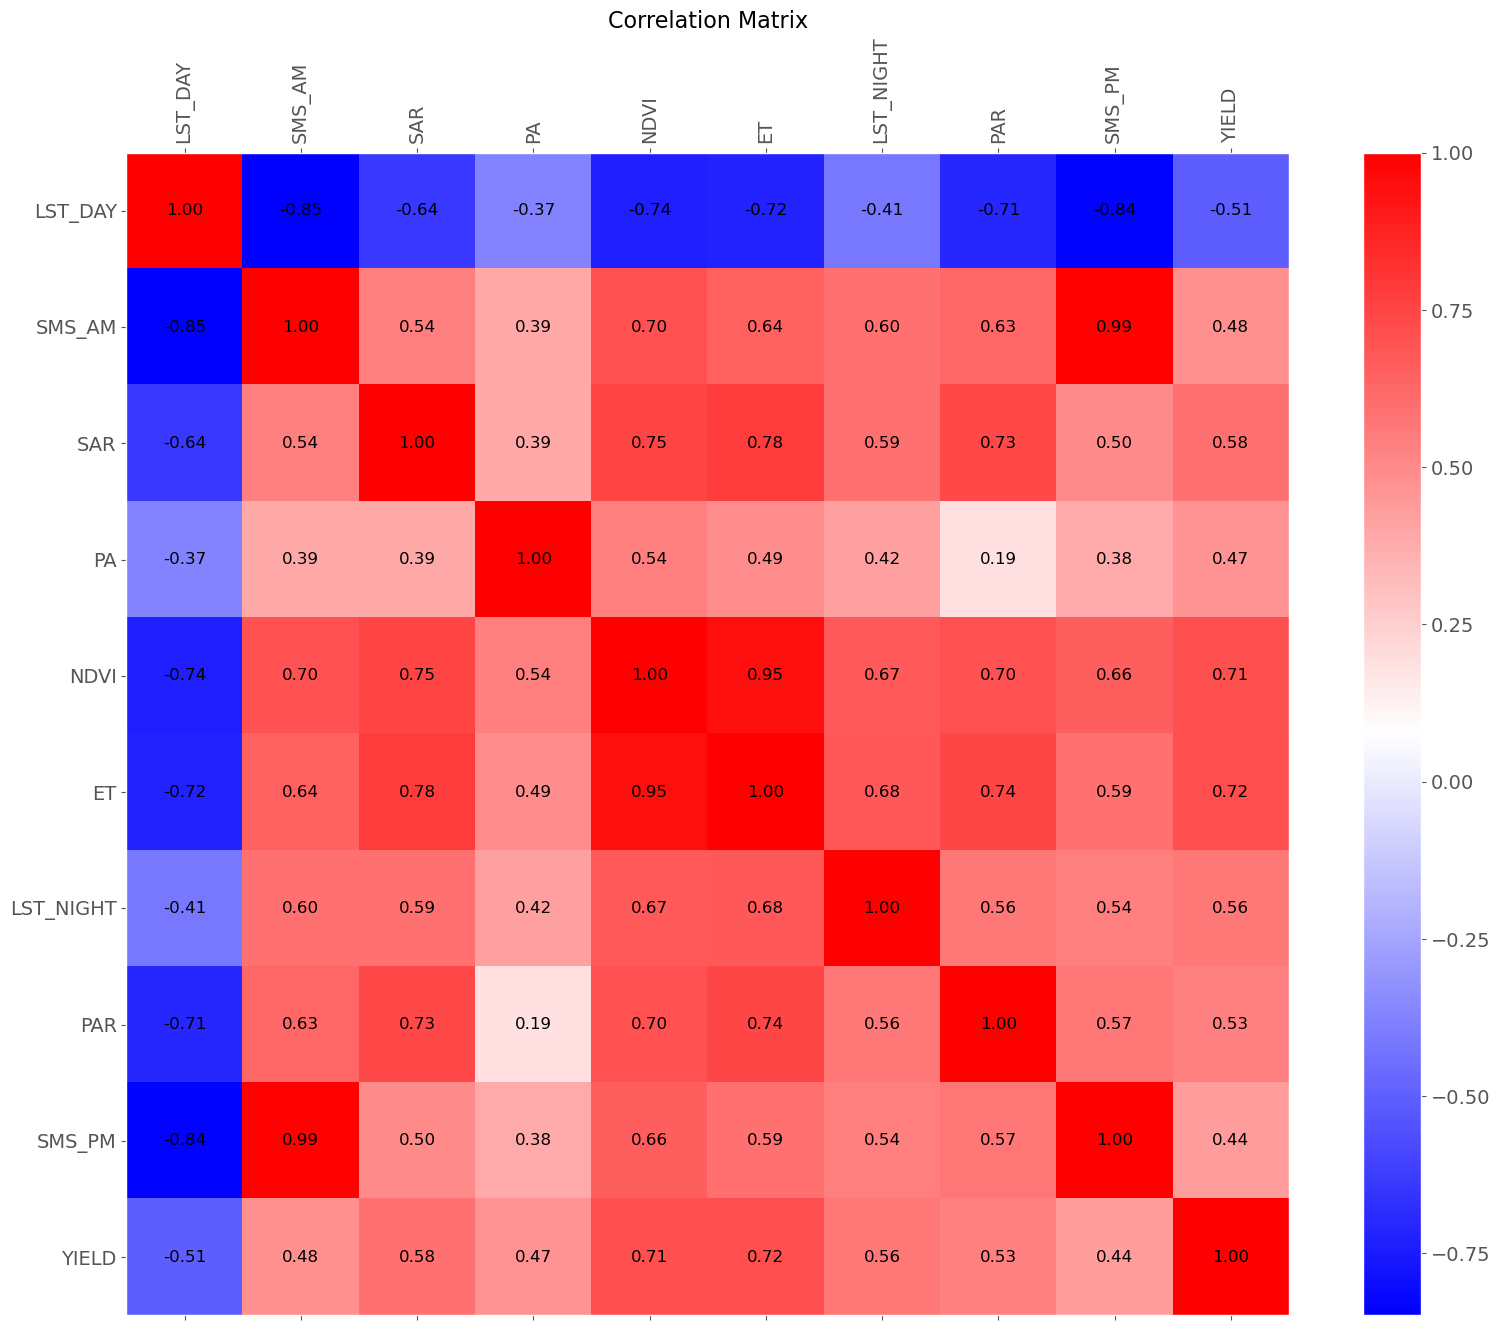

In [6]:
# Correlation coefficients
correlation_matrix = soybean_df.corr()

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(soybean_df.corr(), fignum=f.number,cmap='bwr')
plt.xticks(range(soybean_df.shape[1]), soybean_df.columns, fontsize=14, rotation=90)
plt.yticks(range(soybean_df.shape[1]), soybean_df.columns, fontsize=14)

for i in range(soybean_df.shape[1]):
    for j in range(soybean_df.shape[1]):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', fontsize=12, color='black')

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.savefig('correlation_matrix_soybean.png', bbox_inches='tight')

plt.title('Correlation Matrix', fontsize=16)

## 2. Train & Test Data Split

In [7]:
#split the dataset
X = soybean_df.drop('YIELD', axis=1)
y = soybean_df['YIELD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

## 3. Model Training and Parameter Tuning

### 3.1. Linear Regression (LR)

In [12]:
model_lr = LinearRegression()

# Cross validation
scores = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = np.mean(scores)
std_mse = np.std(scores)

print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean MSE: -35.32626690826363
Standard Deviation of MSE: 15.15328424846526


In [13]:
model_lr.fit(X_train, y_train)

LinearRegression()

### 3.2. Random Forest Regressor (RF)

In [13]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[3,5,10,20,30], 'min_samples_split':[2,4,6,8,10]}


randomState_dt = 10000
model_rf = RandomForestRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(model_rf, hyperparameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 10}
The best score is: 
0.5590065596832314


In [14]:
# Train the final RF
rf_final = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=10000)

### 3.3. Gradient Boosting Regressor (XGB)

In [15]:
import warnings

# 设置忽略 FutureWarning 类型的警告
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# model_xgb =
# soybean_df

# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[2,4,6,8,10], 'n_estimators':[4,8,12,16,20]}

randomState_xgb = 125
xgb = XGBRegressor(random_state=randomState_xgb)

# cv=5 by default, which means 5-fold cross-validation
gscv_xgb = GridSearchCV(xgb, hyperparameters)

gscv_xgb.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (gscv_xgb.best_params_)
print ("The best score is: ")
print (gscv_xgb.best_score_)

The best parameter value is: 
{'max_depth': 2, 'n_estimators': 8}
The best score is: 
0.5461701142037959


### 3.4. Artificial Neural Network (ANN)

In [19]:
model_ann = keras.Sequential([
    layers.Input(shape=(9,)),  # Input layer
    layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(64, activation='relu'),  # Additional hidden layer
    layers.Dropout(0.3),  # Another dropout layer
    layers.Dense(1)  # Output layer
])

#measuring the training with certain metrics
model_ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [20]:
#train the model
model_ann.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: 908.2048 - val_accuracy: 0.0000e+00 - val_loss: 878.7645
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 867.2283 - val_accuracy: 0.0000e+00 - val_loss: 827.1662
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 809.4429 - val_accuracy: 0.0000e+00 - val_loss: 761.5544
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 760.1377 - val_accuracy: 0.0000e+00 - val_loss: 677.4149
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 654.6905 - val_accuracy: 0.0000e+00 - val_loss: 573.2432
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 544.7156 - val_accuracy: 0.0000e+00 - val_loss: 453.4990
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 388.9476 - val_accuracy: 0.0000e+00 - val_loss: 331.2931
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

## 4. Model Evaluation and Performance Comparison

Comparing the performance with using R2 and Root Mean Squared Error (RMSE).

### 4.1. E. Linear Regression (LR)

In [21]:
train_predictions = model_lr.predict(X_train)
test_predictions = model_lr.predict(X_test)

r2_train_lr = r2_score(y_train, train_predictions)
r2_test_lr = r2_score(y_test, test_predictions)

rmse_train_lr = mean_squared_error(y_train, train_predictions, squared=False)
rmse_test_lr = mean_squared_error(y_test, test_predictions, squared=False)

print(f"Training R^2: {r2_train_lr:.4f}")
print(f"Test R^2: {r2_test_lr:.4f}")
print(f"Training RMSE: {rmse_train_lr:.4f}")
print(f"Test RMSE: {rmse_test_lr:.4f}")

Training R^2: 0.5675
Test R^2: 0.4717
Training RMSE: 5.0024
Test RMSE: 5.7549


### 4.2. E. Random Forest Regressor (RF)

In [23]:
r2_train_rf = rf_final.score(X=X_train, y=y_train)
r2_test_rf = rf_final.score(X=X_test, y=y_test)

print("R2 on the training data:")
print(r2_train_rf)
print("R2 on the testing data:")
print(r2_test_rf)

R2 on the training data:
0.8784204641137269
R2 on the testing data:
0.5507919162841205


In [24]:
rmse_train_rf = mean_squared_error(y_train, rf_final.predict(X_train), squared=False)
rmse_test_rf = mean_squared_error(y_test, rf_final.predict(X_test), squared=False)

print("RMSE on the training data:")
print(rmse_train_rf)
print("RMSE on the testing data:")
print(rmse_test_rf)

RMSE on the training data:
2.652352823674576
RMSE on the testing data:
5.306872460725133


                                        Importance
Feature                                           
ET                                          0.7113
LST_NIGHT                                   0.0551
NDVI                                        0.0427
PA                                          0.0069
SMS_PM                                      0.0046
PAR                                         0.0020
SAR                                        -0.0002
SMS_AM                                     -0.0066
LST_DAY                                    -0.0121


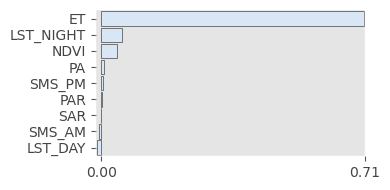

In [46]:
# Calculate and plot the feature importance of the RF model
imp = rfpimp.importances(rf_final, X_test, y_test)
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

### 4.3. E. Gradient Boosting Regressor (XGB)

In [28]:
model_xgb = XGBRegressor(max_depth=gscv_xgb.best_params_['max_depth'], n_estimators=gscv_xgb.best_params_['n_estimators'], random_state=randomState_xgb)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8, n_jobs=None,
             num_parallel_tree=None, random_state=125, ...)

In [29]:
# r2_train_xgb, r2_test_xgb, rmse_train_xgb, rmse_test_xgb
r2_train_xgb = model_xgb.score(X=X_train, y=y_train)
r2_test_xgb = model_xgb.score(X=X_test, y=y_test)
rmse_train_xgb = mean_squared_error(y_train, model_xgb.predict(X_train), squared=False)
rmse_test_xgb = mean_squared_error(y_test, model_xgb.predict(X_test), squared=False)

In [30]:
print("R2 on the training data:")
print(r2_train_xgb)
print("R2 on the testing data:")
print(r2_test_xgb)

R2 on the training data:
0.7055894809268239
R2 on the testing data:
0.5503572720233525


In [31]:
print("RMSE on the training data:")
print(rmse_train_xgb)
print("RMSE on the testing data:")
print(rmse_test_xgb)

RMSE on the training data:
4.1274109838493045
RMSE on the testing data:
5.309439248875522


                                        Importance
Feature                                           
ET                                          0.4905
LST_NIGHT                                   0.0477
NDVI                                        0.0447
SAR                                         0.0129
SMS_AM                                      0.0073
PA                                          0.0069
PAR                                         0.0000
SMS_PM                                      0.0000
LST_DAY                                    -0.0130


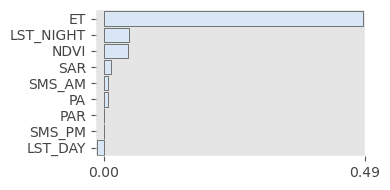

In [32]:
imp_xgb = rfpimp.importances(model_xgb, X_test, y_test) # permutation
print(imp_xgb)
viz_xgb = rfpimp.plot_importances(imp_xgb)
viz_xgb.view()

### 4.4. E. Artificial Neural Network (ANN)

In [33]:
#predictions
y_pred_train_ann = model_ann.predict(X_train).flatten()
y_pred_test_ann = model_ann.predict(X_test).flatten()

#Compute R2 and RMSE
r2_train_ann = np.round(r2_score(y_train, y_pred_train_ann),2)
r2_test_ann = np.round(r2_score(y_test, y_pred_test_ann),2)
rmse_train_ann = np.round(np.sqrt(mean_squared_error(y_train, y_pred_train_ann)),2)
rmse_test_ann = np.round(np.sqrt(mean_squared_error(y_test, y_pred_test_ann)),2)

#print the result
print("Train R2:", r2_train_ann)
print("Test R2:", r2_test_ann)
print("Train RMSE:", rmse_train_ann)
print("Test RMSE:", rmse_test_ann)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train R2: 0.6
Test R2: 0.43
Train RMSE: 4.78
Test RMSE: 5.96


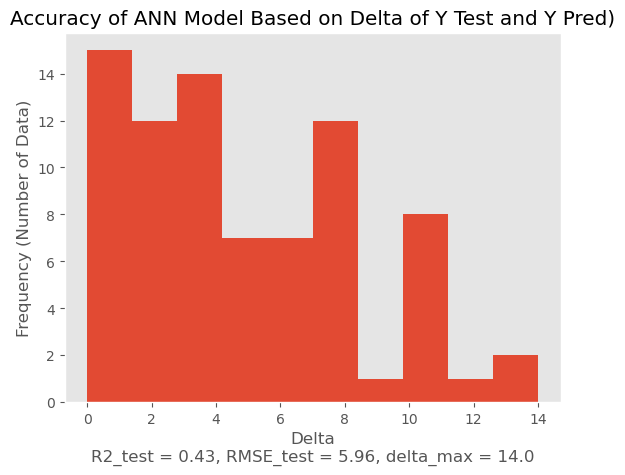

In [34]:
#crosscheck the y value between real and predicted
crosscheck_y_dict = {
    'y_test' : y_test,
    'y_pred' : np.round(y_pred_test_ann,0),
    'delta' : np.abs(np.round((y_test - y_pred_test_ann),0))
}

#plotting histogram
crosscheck_y_df = pd.DataFrame(crosscheck_y_dict)
plt.hist(crosscheck_y_df['delta'], bins=10)
plt.xlabel(f'Delta\nR2_test = {r2_test_ann}, RMSE_test = {rmse_test_ann}, delta_max = {crosscheck_y_df.delta.max()}')
plt.ylabel('Frequency (Number of Data)')
plt.title(f"Accuracy of ANN Model Based on Delta of Y Test and Y Pred)")
plt.show()

### 4.5. Model Performance Comparison

In [36]:
#please input your metrics in here
metrics_dict = {
    'metrics': ["Train R2","Test R2","Train RMSE","Test RMSE"],
    'LR': [r2_train_lr, r2_test_lr, rmse_train_lr, rmse_test_lr],
    'RF': [r2_train_rf, r2_test_rf, rmse_train_rf, rmse_test_rf],
    'XGB': [r2_train_xgb, r2_test_xgb, rmse_train_xgb, rmse_test_xgb],
    'ANN': [r2_train_ann, r2_test_ann, rmse_train_ann, rmse_test_ann]
}

#create dataframe
metrics_df = pd.DataFrame(metrics_dict)
metrics_df.set_index('metrics')

,LR,RF,XGB,ANN
metrics,,,,
Train R2,0.5675,0.8784,0.7056,0.6000
Test R2,0.4717,0.5508,0.5504,0.4300
Train RMSE,5.0024,2.6524,4.1274,4.7800
Test RMSE,5.7549,5.3069,5.3094,5.9600


Based on the comparison, it can be said that the best model that can be used for estimating crop yield is []. From this point, [] model would be used for estimation phase (step 5).

## 5. Crop Yield Estimation and Export Result